In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
datamsci = pd.read_csv("data/DataMSCI.csv", sep=";")

In [12]:
datamsci = datamsci.drop(
    columns=["ISSUER_NAME", "ISSUERID", "ISSUER_LEI", "ISSUER_TICKER"]
)
datamsci

,ISSUER_ISIN,CARBON_EMISSIONS_SCOPE_12_FY09,CARBON_EMISSIONS_SCOPE_12_FY10,CARBON_EMISSIONS_SCOPE_12_FY11,CARBON_EMISSIONS_SCOPE_12_FY12,CARBON_EMISSIONS_SCOPE_12_FY13,CARBON_EMISSIONS_SCOPE_12_FY14,CARBON_EMISSIONS_SCOPE_12_FY15,CARBON_EMISSIONS_SCOPE_12_FY16,CARBON_EMISSIONS_SCOPE_12_FY17,...,SALES_USD_FY14,SALES_USD_FY15,SALES_USD_FY16,SALES_USD_FY17,SALES_USD_FY18,SALES_USD_FY19,SALES_USD_FY20,SALES_USD_FY21,SALES_USD_FY22,SALES_USD_FY23
0,US1264081035,5028640.0,5470674.0,5695440.0,5569075.0,5564960.0,5840132.0,5580687.0,5004017.0,4927403.0,...,12669.00,11811.00,11069.00,11408.00,12250.00,11937.00,10583.00,12522.00,14853.00,14657.00
1,US1270971039,365053.0,350423.0,1059051.0,1232734.0,576547.0,432921.0,528277.0,474483.0,453069.0,...,1953.69,1300.46,1194.63,1747.29,2143.72,2066.28,1405.22,3670.00,9514.00,5684.00
2,CA5592224011,645050.0,1317000.0,1222940.0,1509298.0,1637018.0,1763433.0,1660273.0,2051031.0,2135886.0,...,35046.63,32134.00,35909.37,40254.61,38844.54,40234.98,32647.00,35952.21,36406.77,43753.49
3,US8326964058,402447.0,407538.0,373927.0,357065.0,367913.0,311861.0,330902.0,320640.0,436027.0,...,5692.70,7811.22,7392.30,7357.10,7838.00,7801.00,8002.70,7998.90,8529.20,8178.70
4,US8425871071,123586162.0,134244544.0,123269872.0,101336846.0,104414567.0,114609575.0,104471374.0,102811507.0,101465915.0,...,18467.00,17489.00,19896.00,23031.00,23495.00,21419.00,20375.00,23113.00,29279.00,25253.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,IE00028FXN24,NaN,NaN,2613282.0,4456761.0,4620267.0,4725008.0,7797589.0,7613155.0,7192551.0,...,9895.10,11558.55,14171.80,14859.70,16285.10,18289.00,17578.80,18746.10,21256.50,12194.28
1390,US4385161066,4634860.0,5015665.0,8205000.0,7289119.0,6107431.0,5759991.0,5262138.0,4218429.0,2583877.0,...,40306.00,38581.00,39302.00,40534.00,41802.00,36709.00,32637.00,34392.00,35466.00,36662.00
1391,US88160R1014,3107.0,3241.0,5669.0,11471.0,55284.0,87446.0,115931.0,167326.0,128461.0,...,3198.36,4046.02,7000.13,11758.75,21461.27,24578.00,31536.00,53823.00,81462.00,96773.00
1392,US31488V1070,710160.0,793428.0,729365.0,642112.0,367483.0,370066.0,352088.0,338269.0,338888.0,...,22167.38,20804.58,19158.71,20070.56,20752.00,20970.72,22542.82,23275.15,26519.21,31522.83


In [13]:
# print(
#     datamsci[
#         [
#             col
#             for col in datamsci.columns
#             if col.startswith("CARBON_EMISSIONS_SCOPE_12_FY")
#         ]
#     ]
#     .isna()
#     .sum()
# )
datamsci = datamsci.dropna(subset=["CARBON_EMISSIONS_SCOPE_12_FY09"])
datamsci = datamsci.dropna(subset=["CARBON_EMISSIONS_SCOPE_12_FY14"])
datamsci = datamsci.dropna(subset=["CARBON_EMISSIONS_SCOPE_12_FY22"])
print(datamsci.isna().sum())
print(datamsci.shape)

ISSUER_ISIN                                  0
CARBON_EMISSIONS_SCOPE_12_FY09               0
CARBON_EMISSIONS_SCOPE_12_FY10               0
CARBON_EMISSIONS_SCOPE_12_FY11               0
CARBON_EMISSIONS_SCOPE_12_FY12               0
CARBON_EMISSIONS_SCOPE_12_FY13               0
CARBON_EMISSIONS_SCOPE_12_FY14               0
CARBON_EMISSIONS_SCOPE_12_FY15               0
CARBON_EMISSIONS_SCOPE_12_FY16               0
CARBON_EMISSIONS_SCOPE_12_FY17               0
CARBON_EMISSIONS_SCOPE_12_FY18               0
CARBON_EMISSIONS_SCOPE_12_FY19               0
CARBON_EMISSIONS_SCOPE_12_FY20               0
CARBON_EMISSIONS_SCOPE_12_FY21               0
CARBON_EMISSIONS_SCOPE_12_FY22               0
CARBON_EMISSIONS_SCOPE_12_FY23             512
CARBON_EMISSIONS_SCOPE_3_FY09              914
CARBON_EMISSIONS_SCOPE_3_FY10              813
CARBON_EMISSIONS_SCOPE_3_FY11              694
CARBON_EMISSIONS_SCOPE_3_FY12              605
CARBON_EMISSIONS_SCOPE_3_FY13              581
CARBON_EMISSI

Calcul de la carbon trend 

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


# Calculer beta1 pour chaque ligne (entreprise)
def calculate_beta1(row):
    emission_columns = [
        col
        for col in datamsci.columns
        if col.startswith("CARBON_EMISSIONS_SCOPE_12_FY")
    ]
    years = np.arange(2009, 2024, 1).reshape(-1, 1)  # Années
    emissions = row[emission_columns].values.reshape(
        -1, 1
    )  # Émissions pour une entreprise
    if pd.isna(row["CARBON_EMISSIONS_SCOPE_12_FY23"]):
        years = years[:-1]
        emissions = emissions[:-1]

    model = LinearRegression().fit(years, emissions)
    return model.coef_[0][0]  # Le coefficient beta1


# Ajouter la nouvelle colonne
datamsci["Beta1"] = datamsci.apply(calculate_beta1, axis=1)
datamsci

,ISSUER_ISIN,CARBON_EMISSIONS_SCOPE_12_FY09,CARBON_EMISSIONS_SCOPE_12_FY10,CARBON_EMISSIONS_SCOPE_12_FY11,CARBON_EMISSIONS_SCOPE_12_FY12,CARBON_EMISSIONS_SCOPE_12_FY13,CARBON_EMISSIONS_SCOPE_12_FY14,CARBON_EMISSIONS_SCOPE_12_FY15,CARBON_EMISSIONS_SCOPE_12_FY16,CARBON_EMISSIONS_SCOPE_12_FY17,...,SALES_USD_FY15,SALES_USD_FY16,SALES_USD_FY17,SALES_USD_FY18,SALES_USD_FY19,SALES_USD_FY20,SALES_USD_FY21,SALES_USD_FY22,SALES_USD_FY23,Beta1
0,US1264081035,5028640.0,5470674.0,5695440.0,5569075.0,5564960.0,5840132.0,5580687.0,5004017.0,4927403.0,...,11811.00,11069.00,11408.00,12250.00,11937.00,10583.00,12522.00,14853.00,14657.00,-1.123016e+05
1,US1270971039,365053.0,350423.0,1059051.0,1232734.0,576547.0,432921.0,528277.0,474483.0,453069.0,...,1300.46,1194.63,1747.29,2143.72,2066.28,1405.22,3670.00,9514.00,5684.00,4.393637e+04
2,CA5592224011,645050.0,1317000.0,1222940.0,1509298.0,1637018.0,1763433.0,1660273.0,2051031.0,2135886.0,...,32134.00,35909.37,40254.61,38844.54,40234.98,32647.00,35952.21,36406.77,43753.49,5.988347e+04
3,US8326964058,402447.0,407538.0,373927.0,357065.0,367913.0,311861.0,330902.0,320640.0,436027.0,...,7811.22,7392.30,7357.10,7838.00,7801.00,8002.70,7998.90,8529.20,8178.70,2.401092e+03
4,US8425871071,123586162.0,134244544.0,123269872.0,101336846.0,104414567.0,114609575.0,104471374.0,102811507.0,101465915.0,...,17489.00,19896.00,23031.00,23495.00,21419.00,20375.00,23113.00,29279.00,25253.00,-3.504930e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,US5049221055,139436.0,148619.0,164609.0,174224.0,178430.0,184675.0,261294.0,289909.0,313522.0,...,8505.70,9437.20,10205.90,11333.40,11554.80,13978.50,16120.90,14876.80,12161.60,1.676995e+04
1390,US4385161066,4634860.0,5015665.0,8205000.0,7289119.0,6107431.0,5759991.0,5262138.0,4218429.0,2583877.0,...,38581.00,39302.00,40534.00,41802.00,36709.00,32637.00,34392.00,35466.00,36662.00,-4.113014e+05
1391,US88160R1014,3107.0,3241.0,5669.0,11471.0,55284.0,87446.0,115931.0,167326.0,128461.0,...,4046.02,7000.13,11758.75,21461.27,24578.00,31536.00,53823.00,81462.00,96773.00,4.379765e+04
1392,US31488V1070,710160.0,793428.0,729365.0,642112.0,367483.0,370066.0,352088.0,338269.0,338888.0,...,20804.58,19158.71,20070.56,20752.00,20970.72,22542.82,23275.15,26519.21,31522.83,-4.207554e+04


Création des colonnes pour les projections d'émissions carbone

In [ ]:
def project_emissions(row):
    beta1 = row["Beta1"]

    emission_columns = [
        col
        for col in datamsci.columns
        if col.startswith("CARBON_EMISSIONS_SCOPE_12_FY")
    ]
    last_valid_year = max(
        [
            int(col.split("_FY")[-1]) + 2000
            for col in emission_columns
            if not pd.isna(row[col])
        ]
    )

    # Si 2023 est manquant, calculer sa projection
    if pd.isna(row["CARBON_EMISSIONS_SCOPE_12_FY23"]):
        row["CARBON_EMISSIONS_SCOPE_12_FY23"] = row[
            f"CARBON_EMISSIONS_SCOPE_12_FY{last_valid_year % 100:02d}"
        ] + beta1 * (2023 - last_valid_year)

    # Projeter les émissions pour les années 2024 à 2050
    for year in range(2024, 2051):
        row[f"CARBON_EMISSIONS_SCOPE_12_FY{year % 100:02d}"] = row[
            "CARBON_EMISSIONS_SCOPE_12_FY23"
        ] + beta1 * (year - 2023)

    return row


datamsci = datamsci.apply(project_emissions, axis=1)
datamsci

,ISSUER_ISIN,CARBON_EMISSIONS_SCOPE_12_FY09,CARBON_EMISSIONS_SCOPE_12_FY10,CARBON_EMISSIONS_SCOPE_12_FY11,CARBON_EMISSIONS_SCOPE_12_FY12,CARBON_EMISSIONS_SCOPE_12_FY13,CARBON_EMISSIONS_SCOPE_12_FY14,CARBON_EMISSIONS_SCOPE_12_FY15,CARBON_EMISSIONS_SCOPE_12_FY16,CARBON_EMISSIONS_SCOPE_12_FY17,...,CARBON_EMISSIONS_SCOPE_12_FY41,CARBON_EMISSIONS_SCOPE_12_FY42,CARBON_EMISSIONS_SCOPE_12_FY43,CARBON_EMISSIONS_SCOPE_12_FY44,CARBON_EMISSIONS_SCOPE_12_FY45,CARBON_EMISSIONS_SCOPE_12_FY46,CARBON_EMISSIONS_SCOPE_12_FY47,CARBON_EMISSIONS_SCOPE_12_FY48,CARBON_EMISSIONS_SCOPE_12_FY49,CARBON_EMISSIONS_SCOPE_12_FY50
0,US1264081035,5028640.0,5470674.0,5695440.0,5569075.0,5564960.0,5840132.0,5580687.0,5004017.0,4927403.0,...,2.397651e+06,2.285349e+06,2.173048e+06,2.060746e+06,1.948445e+06,1.836143e+06,1.723841e+06,1.611540e+06,1.499238e+06,1.386937e+06
1,US1270971039,365053.0,350423.0,1059051.0,1232734.0,576547.0,432921.0,528277.0,474483.0,453069.0,...,2.550349e+06,2.594285e+06,2.638222e+06,2.682158e+06,2.726094e+06,2.770031e+06,2.813967e+06,2.857904e+06,2.901840e+06,2.945776e+06
2,CA5592224011,645050.0,1317000.0,1222940.0,1509298.0,1637018.0,1763433.0,1660273.0,2051031.0,2135886.0,...,3.103982e+06,3.163865e+06,3.223749e+06,3.283632e+06,3.343516e+06,3.403399e+06,3.463282e+06,3.523166e+06,3.583049e+06,3.642933e+06
3,US8326964058,402447.0,407538.0,373927.0,357065.0,367913.0,311861.0,330902.0,320640.0,436027.0,...,4.297488e+05,4.321498e+05,4.345509e+05,4.369520e+05,4.393531e+05,4.417542e+05,4.441553e+05,4.465564e+05,4.489575e+05,4.513586e+05
4,US8425871071,123586162.0,134244544.0,123269872.0,101336846.0,104414567.0,114609575.0,104471374.0,102811507.0,101465915.0,...,1.641127e+07,1.290634e+07,9.401408e+06,5.896478e+06,2.391549e+06,-1.113381e+06,-4.618310e+06,-8.123240e+06,-1.162817e+07,-1.513310e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,US5049221055,139436.0,148619.0,164609.0,174224.0,178430.0,184675.0,261294.0,289909.0,313522.0,...,6.332311e+05,6.500011e+05,6.667710e+05,6.835410e+05,7.003109e+05,7.170809e+05,7.338508e+05,7.506208e+05,7.673908e+05,7.841607e+05
1390,US4385161066,4634860.0,5015665.0,8205000.0,7289119.0,6107431.0,5759991.0,5262138.0,4218429.0,2583877.0,...,-6.058532e+06,-6.469833e+06,-6.881134e+06,-7.292436e+06,-7.703737e+06,-8.115039e+06,-8.526340e+06,-8.937641e+06,-9.348943e+06,-9.760244e+06
1391,US88160R1014,3107.0,3241.0,5669.0,11471.0,55284.0,87446.0,115931.0,167326.0,128461.0,...,1.442155e+06,1.485953e+06,1.529751e+06,1.573548e+06,1.617346e+06,1.661144e+06,1.704941e+06,1.748739e+06,1.792537e+06,1.836334e+06
1392,US31488V1070,710160.0,793428.0,729365.0,642112.0,367483.0,370066.0,352088.0,338269.0,338888.0,...,-5.466263e+05,-5.887019e+05,-6.307774e+05,-6.728529e+05,-7.149285e+05,-7.570040e+05,-7.990796e+05,-8.411551e+05,-8.832307e+05,-9.253062e+05


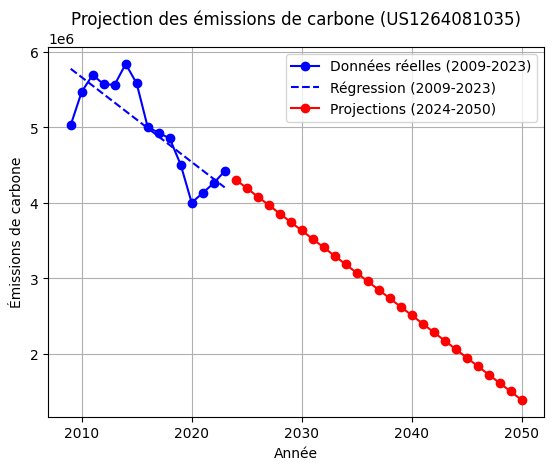

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


def plot_emissions(row):
    # Identifiez les colonnes d'émissions
    emission_columns = [
        col
        for col in datamsci.columns
        if col.startswith("CARBON_EMISSIONS_SCOPE_12_FY")
    ]
    # Années de 2009 à 2050
    years = np.arange(2009, 2051)
    # Émissions correspondant à ces années
    emissions = row[emission_columns].values

    # Années de la régression : 2009 à 2023
    regression_years = np.arange(2009, 2024).reshape(-1, 1)
    regression_emissions = row[emission_columns[: len(regression_years)]].values

    # Ajuster le modèle de régression linéaire
    model = LinearRegression().fit(regression_years, regression_emissions)
    regression_line = model.predict(regression_years)

    # Séparer les années pour les projections (2024 à 2050)
    projection_years = years[15:]  # Années 2024 à 2050
    projection_emissions = emissions[15:]

    # Tracer les données réelles (2009 à 2023)
    plt.plot(
        years[:15],
        emissions[:15],
        label="Données réelles (2009-2023)",
        color="blue",
        marker="o",
    )

    # Tracer la droite de régression pour 2009 à 2023
    plt.plot(
        regression_years,
        regression_line,
        linestyle="--",
        color="blue",
        label="Régression (2009-2023)",
    )

    # Tracer les projections (2024 à 2050)
    plt.plot(
        projection_years,
        projection_emissions,
        label="Projections (2024-2050)",
        color="red",
        marker="o",
    )

    # Ajouter des labels et légendes
    plt.xlabel("Année")
    plt.ylabel("Émissions de carbone")
    plt.title(f"Projection des émissions de carbone ({row['ISSUER_ISIN']})")
    plt.legend()
    plt.grid(True)
    plt.show()


# Afficher le graphique pour la première entreprise
plot_emissions(datamsci.iloc[0])

(42, 1) (42, 1)


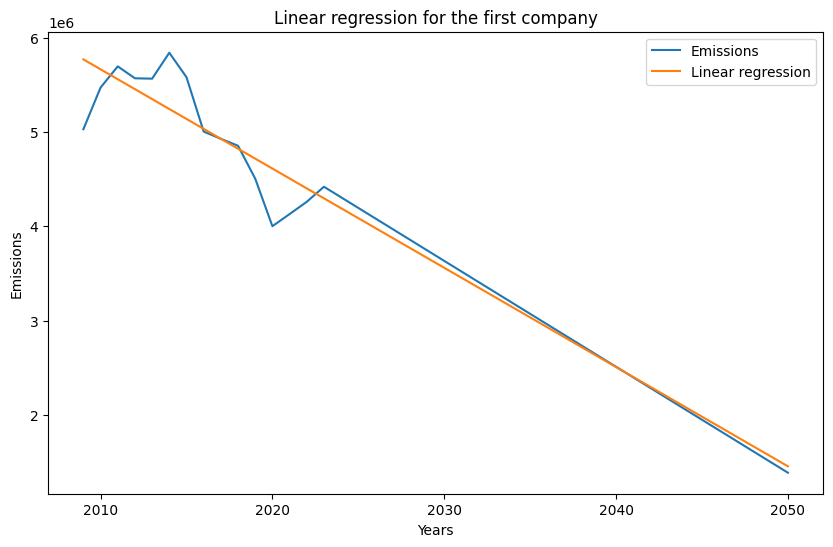

-105235.36553763876


In [20]:
# show the linear regression plot for the first company
import seaborn as sns

emission_columns = [
    col for col in datamsci.columns if col.startswith("CARBON_EMISSIONS_SCOPE_12_FY")
]
years = np.arange(2009, 2051, 1).reshape(-1, 1)
emissions = datamsci.loc[0, emission_columns].values.reshape(-1, 1)

print(years.shape, emissions.shape)

model = LinearRegression().fit(years, emissions)
predictions = model.predict(years)

plt.figure(figsize=(10, 6))
sns.lineplot(x=years.flatten(), y=emissions.flatten(), label="Emissions")
sns.lineplot(x=years.flatten(), y=predictions.flatten(), label="Linear regression")
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.title("Linear regression for the first company")
plt.legend()
plt.show()

print(model.coef_[0][0])

In [21]:
# Complete the dataset with predictions up to 2050
beta1 = model.coef_[0][0]

for i in range(2024, 2051):
    datamsci[f"CARBON_EMISSIONS_SCOPE_12_FY{i}"] = beta1 * (i - 2009) + model.intercept_

ValueError: Length of values (1) does not match length of index (1187)

In [22]:
ce3_columns = [col for col in datamsci.columns if "CARBON_EMISSIONS_SCOPE_3" in col]
ce12_columns = [col for col in datamsci.columns if "CARBON_EMISSIONS_SCOPE_12" in col]
sales_columns = [col for col in datamsci.columns if "SALES" in col]

ce3 = datamsci[["ISSUER_ISIN"] + ce3_columns]
ce12 = datamsci[["ISSUER_ISIN"] + ce12_columns]
sales = datamsci[["ISSUER_ISIN"] + sales_columns]
weights = datamsci[["ISSUER_ISIN", "MarketCap_USD"]]

In [23]:
ci12 = ce12.copy()
ci3 = ce3.copy()
for i in range(len(ce12_columns)):
    ci12[ce12_columns[i]] = ce12[ce12_columns[i]] / sales[sales_columns[i]]
    ci3[ce3_columns[i]] = ce3[ce3_columns[i]] / sales[sales_columns[i]]

ci12.columns = [
    col.replace("CARBON_EMISSIONS_SCOPE_12_", "CI_SCOPE_12_") for col in ci12.columns
]
ci12

IndexError: list index out of range

In [40]:
ci3.columns = [
    col.replace("CARBON_EMISSIONS_SCOPE_3_", "CI_SCOPE_3_") for col in ci3.columns
]
ci3

,ISSUER_ISIN,CI_SCOPE_3_FY09,CI_SCOPE_3_FY10,CI_SCOPE_3_FY11,CI_SCOPE_3_FY12,CI_SCOPE_3_FY13,CI_SCOPE_3_FY14,CI_SCOPE_3_FY15,CI_SCOPE_3_FY16,CI_SCOPE_3_FY17,CI_SCOPE_3_FY18,CI_SCOPE_3_FY19,CI_SCOPE_3_FY20,CI_SCOPE_3_FY21,CI_SCOPE_3_FY22,CI_SCOPE_3_FY23
0,US1264081035,2.279394,1.937571,12.378609,15.088551,21.567271,246.441787,284.981289,387.961333,311.335554,12.565224,205.262461,241.883681,193.390433,175.753652,80.567033
1,US1270971039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA5592224011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65330.150208,433.399302,1985.749443,2303.011995,1340.588854
3,US8326964058,1.809441,2.086727,1.730615,4.299848,78.518875,79.443146,56.776662,NaN,NaN,NaN,815.488912,755.310083,971.264174,846.874619,NaN
4,US8425871071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503.631236,1587.550500,1810.236145,1797.040540,1507.628564,2630.479183,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,IE00028FXN24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.039063,590.656002,590.704448,522.956215,811.528295,576.058674,486.271964,791.573016
1390,US4385161066,NaN,NaN,NaN,NaN,NaN,NaN,175.129909,183.099868,464.069325,451.266590,492.714321,494.400313,490.020964,513.203914,NaN
1391,US88160R1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.304182,369.497434,NaN
1392,US31488V1070,4.351558,4.427531,0.398243,0.435300,5.700488,5.101911,5.621503,5.985789,5.792414,5.614350,7.944076,7.940267,6.763437,8.204015,NaN


In [ ]:
# Normalize weights
weights["MarketCap_USD"] = weights["MarketCap_USD"] / weights["MarketCap_USD"].sum()

/var/folders/v5/_0ss5l5d6nz8d575gs5spbx40000gn/T/ipykernel_22078/666855065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights["MarketCap_USD"] = weights["MarketCap_USD"] / weights["MarketCap_USD"].sum()


ISSUER_ISIN      US1264081035US1270971039CA5592224011US83269640...
MarketCap_USD                                                  1.0
dtype: object